## Decision Tree
### Split criterion: Goodness function
> #### Used to select the attribute to be split at a tree node during the tree generation phase   
> #### Different algorithms may use different goodness functions:   
>> Information gain (used in ID3/C4.5)    
>> Gain ratio   
>> Gini index (used in CART)

### Expected information (entropy) needed to classify a tuple in D:
$$Info(D) = - \sum_{i=1}^{m} p_i log_2(p_i)$$

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import warnings
warnings.simplefilter('ignore')
from IPython.display import Image

from my_ml_tools.my_ml_plot import Plot_2d
from my_ml_tools.my_ml_plot import Plot_2d_decision
from my_ml_tools.my_ml_plot import Plot_decision_regions

In [2]:
def entropy(i, j):
    if j is None:
        return 0
    else:
        return - (i/(i+j))*np.log2(i/(i+j)) - (j/(i+j))*np.log2(j/(i+j))
    
def cal_entropy(X, y, threshold, axis=1):
    g = [[], []]
    for i in range(y.size):
        if X[i, axis] <= threshold:
            g[0].append(i)
        else:
            g[1].append(i)
    i0 = entropy(np.bincount(y[g[0]])[0], np.bincount(y[g[0]])[1] if len(g[0]) > 1 else None)
    if len(g[1]) == 0:
        i1 = 0
    else:
        i1 = entropy(np.bincount(y[g[1]])[0], np.bincount(y[g[1]])[1] if len(g[1]) > 1 else None)
    return (i0, i1)

def plot_myTree(X, y, ax=None):
    if ax is None:
        ax = plt.gca()
    axes = []
    Threshold = []
    Info_0 = []
    Info_1 = []
    for axis in [1, 0]:
        xx = sorted(X[:, axis])
        for i in range(0, len(xx)-1):
            threshold = (xx[i] + xx[i+1]) / 2
            i0, i1 = cal_entropy(X, y, threshold=threshold, axis=axis)
            axes.append(axis)
            Threshold.append(threshold)
            Info_0.append(i0)
            Info_1.append(i1)

    df = pd.DataFrame({
        'Axis': axes,
        'Threshold': Threshold,
        'Info_0': Info_0,
        'Info_1': Info_1
    })
    df['Info_0+Info_1'] = df['Info_0'] + df['Info_1']
    df.sort_values(by='Info_0+Info_1')

    if df.iloc[0, 0] == 0:
        ax.plot([df.iloc[0, 1], df.iloc[0, 1]], [X[:, 1].min(), X[:, 1].max()], 'r--')
    else:
        ax.plot([X[:, 0].min(), X[:, 0].max()], [df.iloc[0, 1], df.iloc[0, 1]], 'r--')

### Example: tree_data_1

(0.0, 1.0, 0.0, 1.0)

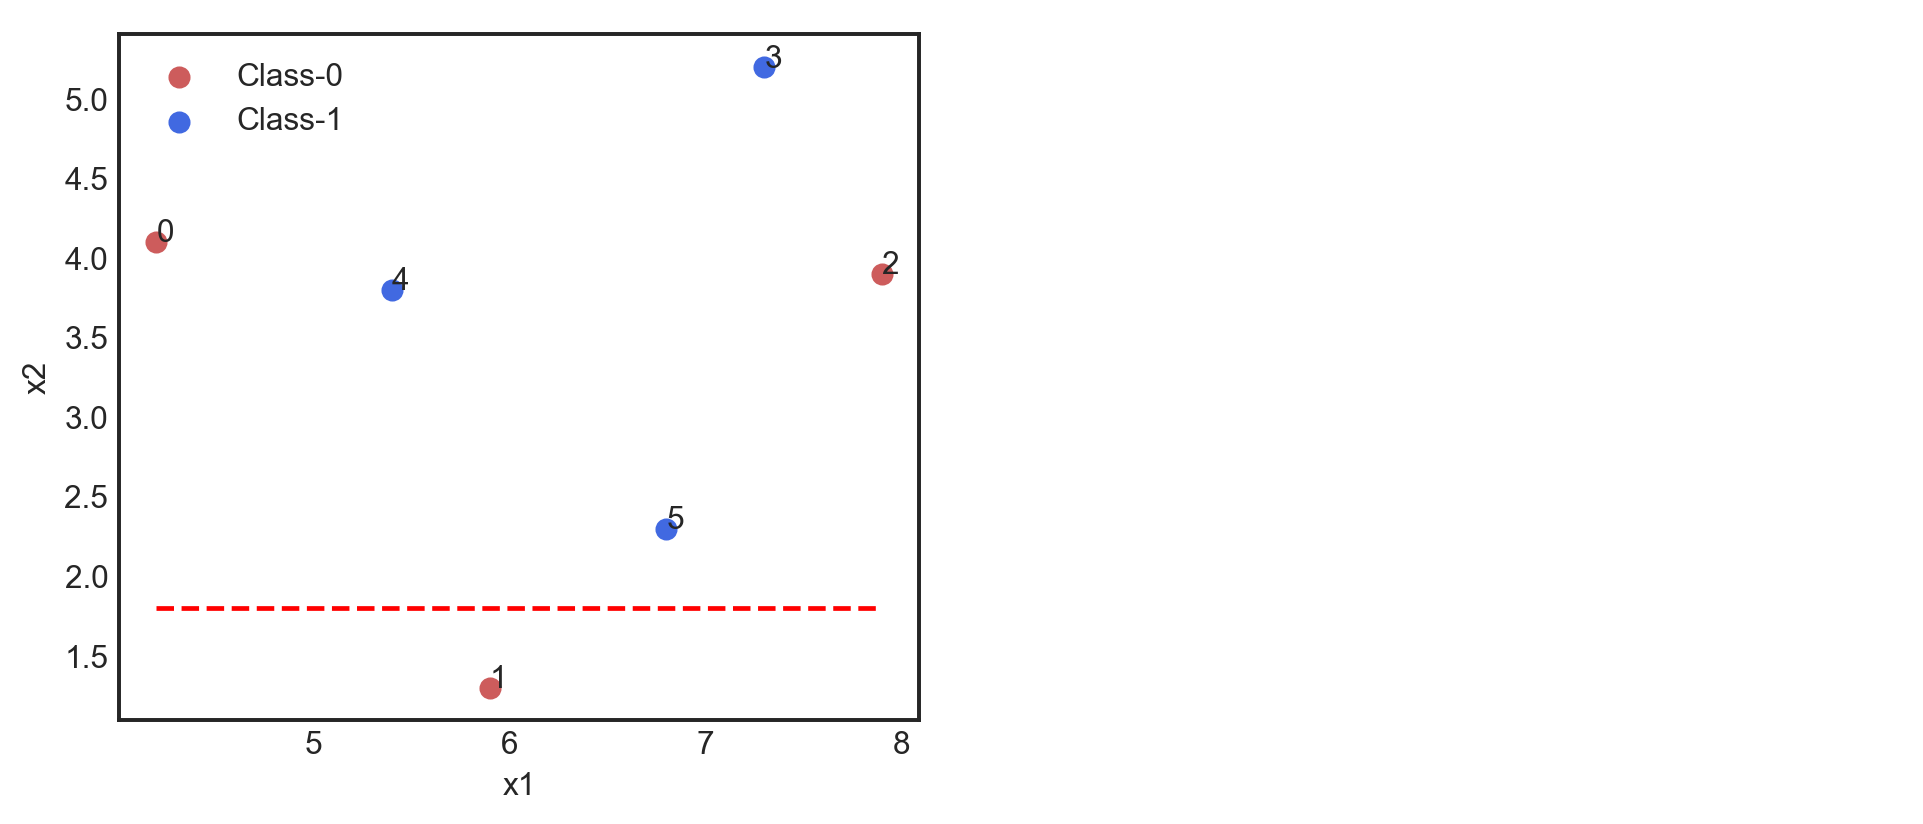

In [3]:
df = pd.read_csv('./data/tree_data_1.csv')
X = df.values[:, :2]
y = df.values[:, 2].astype(np.int)

fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))
Plot_2d(X, y, ax=axes[0])

for i in range(len(y)):
        axes[0].annotate(str(i), (X[i, 0], X[i, 1]))

plot_myTree(X, y, ax=axes[0])
axes[1].axis('off')

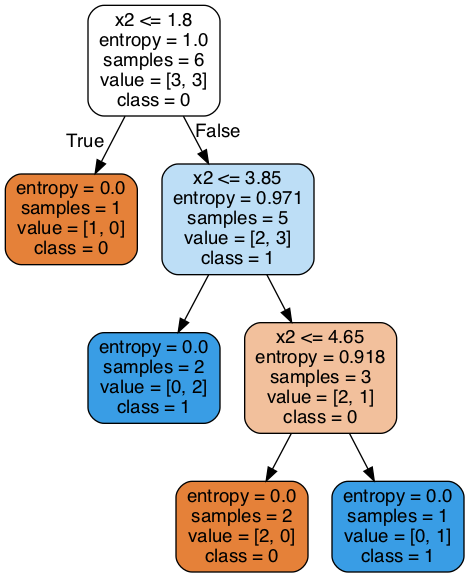

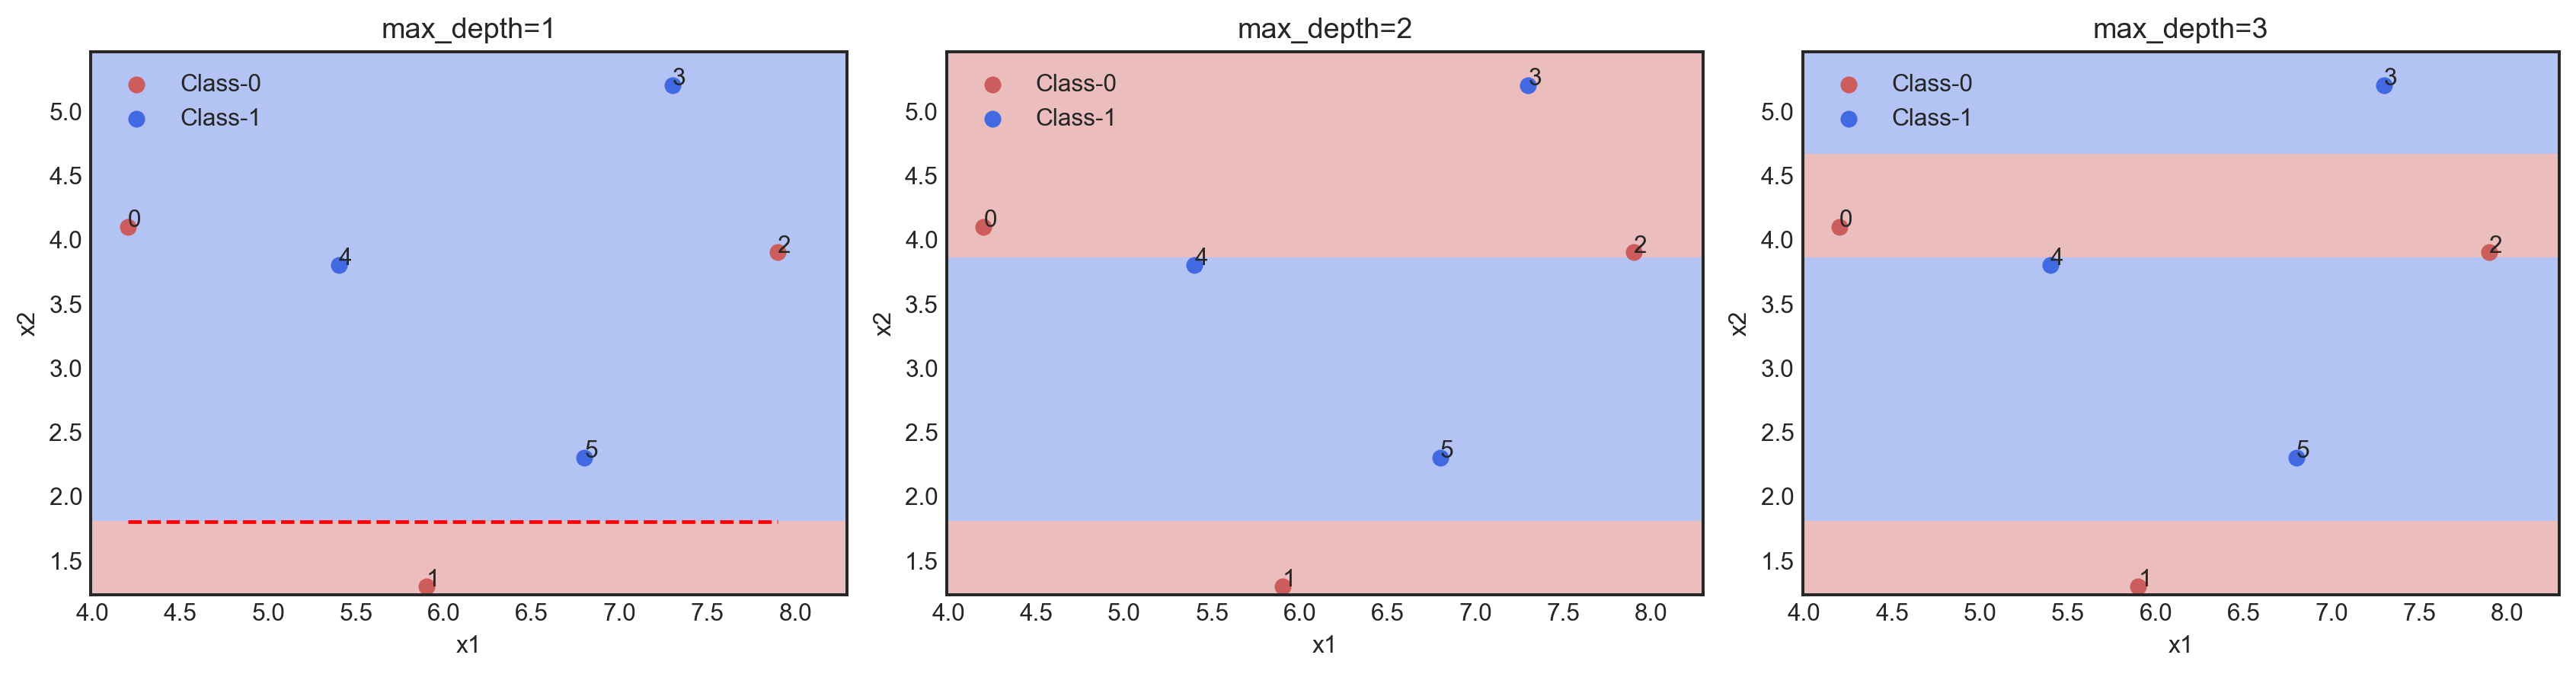

In [4]:
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('./data/tree_data_1.csv')
X = df.values[:, :2]
y = df.values[:, 2].astype(np.int)

fig, axes = plt.subplots(1, 3, dpi=227, figsize=(15, 4))
for (ax, depth) in zip(axes.ravel(), [1, 2, 3]):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0)
    clf.fit(X, y)

    Plot_2d_decision(clf, X, y, ax=ax)
    Plot_2d(X, y, ax=ax)
    
    for i in range(len(y)):
        ax.annotate(str(i), (X[i, 0], X[i, 1]))
    ax.set_title(f'max_depth={depth}')
plot_myTree(X, y, ax=axes[0])
plt.tight_layout()

from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(
    clf, 
    filled=True,
    rounded=True,
    class_names=['0', '1'],
    feature_names=['x1', 'x2'],
    out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('./charts/tree.png')

from IPython.display import Image
Image(filename = './charts/tree.png', width=500)

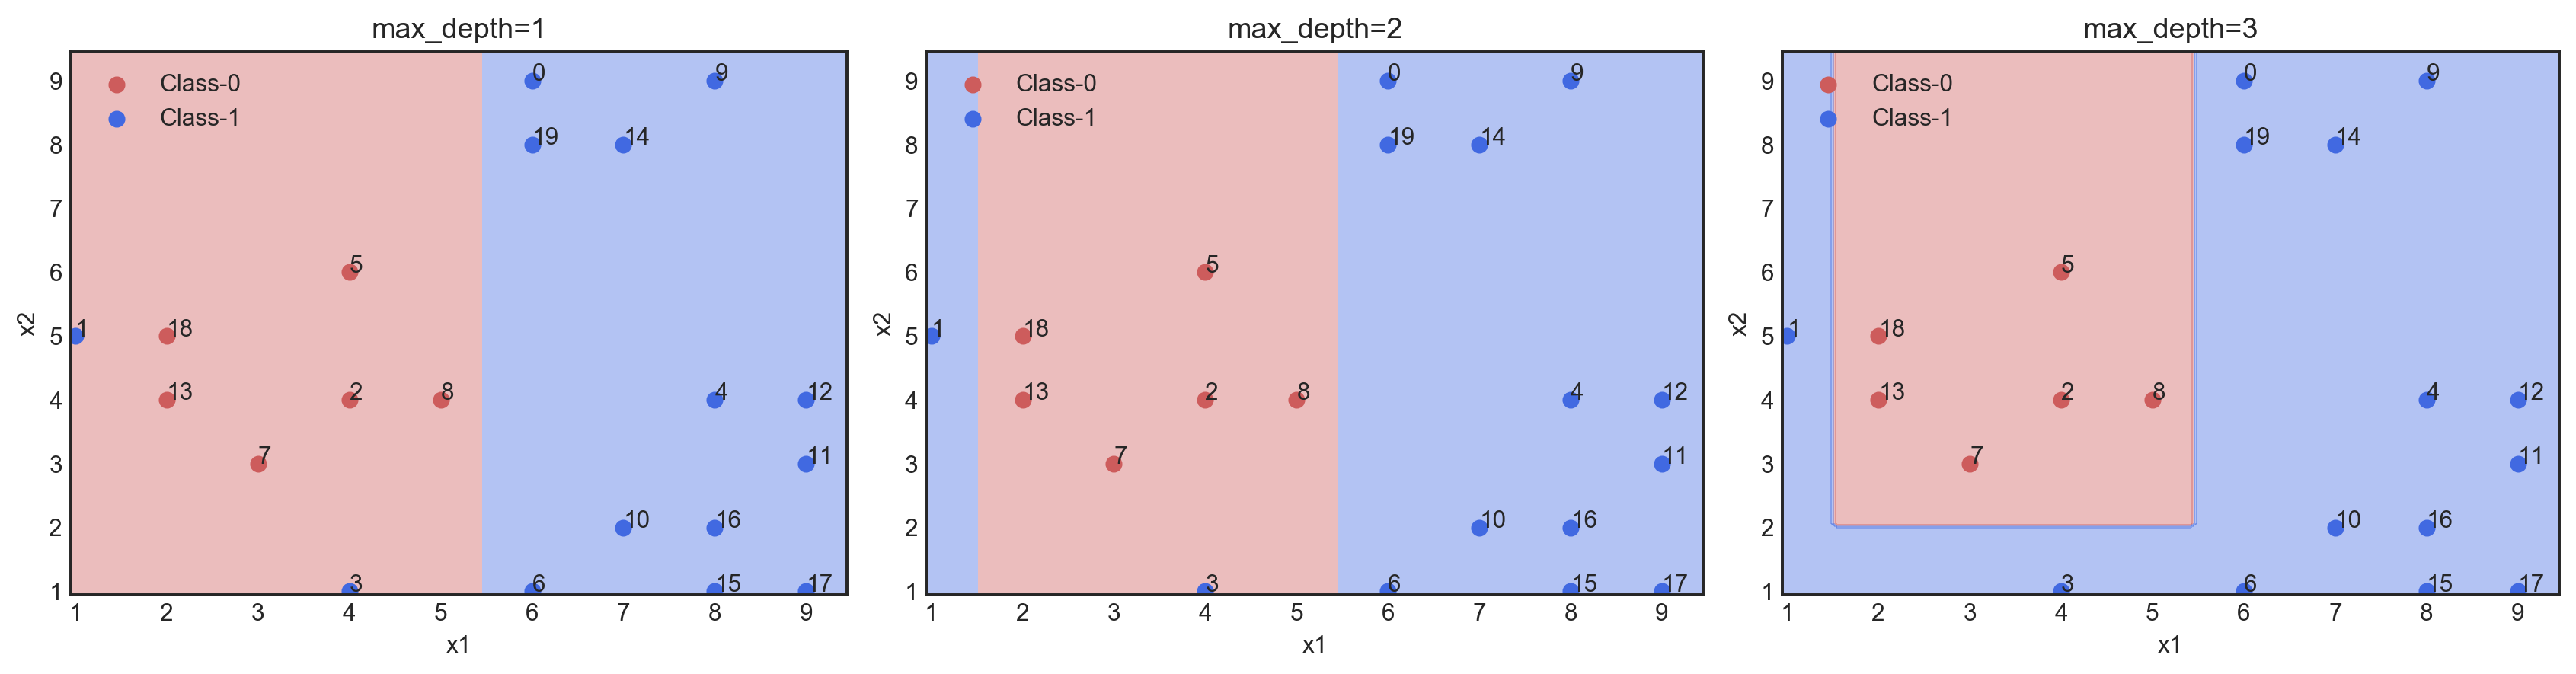

In [5]:
df = pd.read_csv('./data/tree_data_2.csv')
X = df.values[:, :2]
y = df.values[:, 2].astype(np.int)

fig, axes = plt.subplots(1, 3, dpi=227, figsize=(15, 4))
axes = axes.ravel()
for (ax, depth) in zip(axes, [1, 2, 3]):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0)
    clf.fit(X, y)

    Plot_2d_decision(clf, X, y, ax=ax)
    Plot_2d(X, y, ax=ax)
    
    for i in range(len(y)):
        ax.annotate(str(i), (X[i, 0], X[i, 1]))
    ax.set_title(f'max_depth={depth}')
plt.tight_layout()

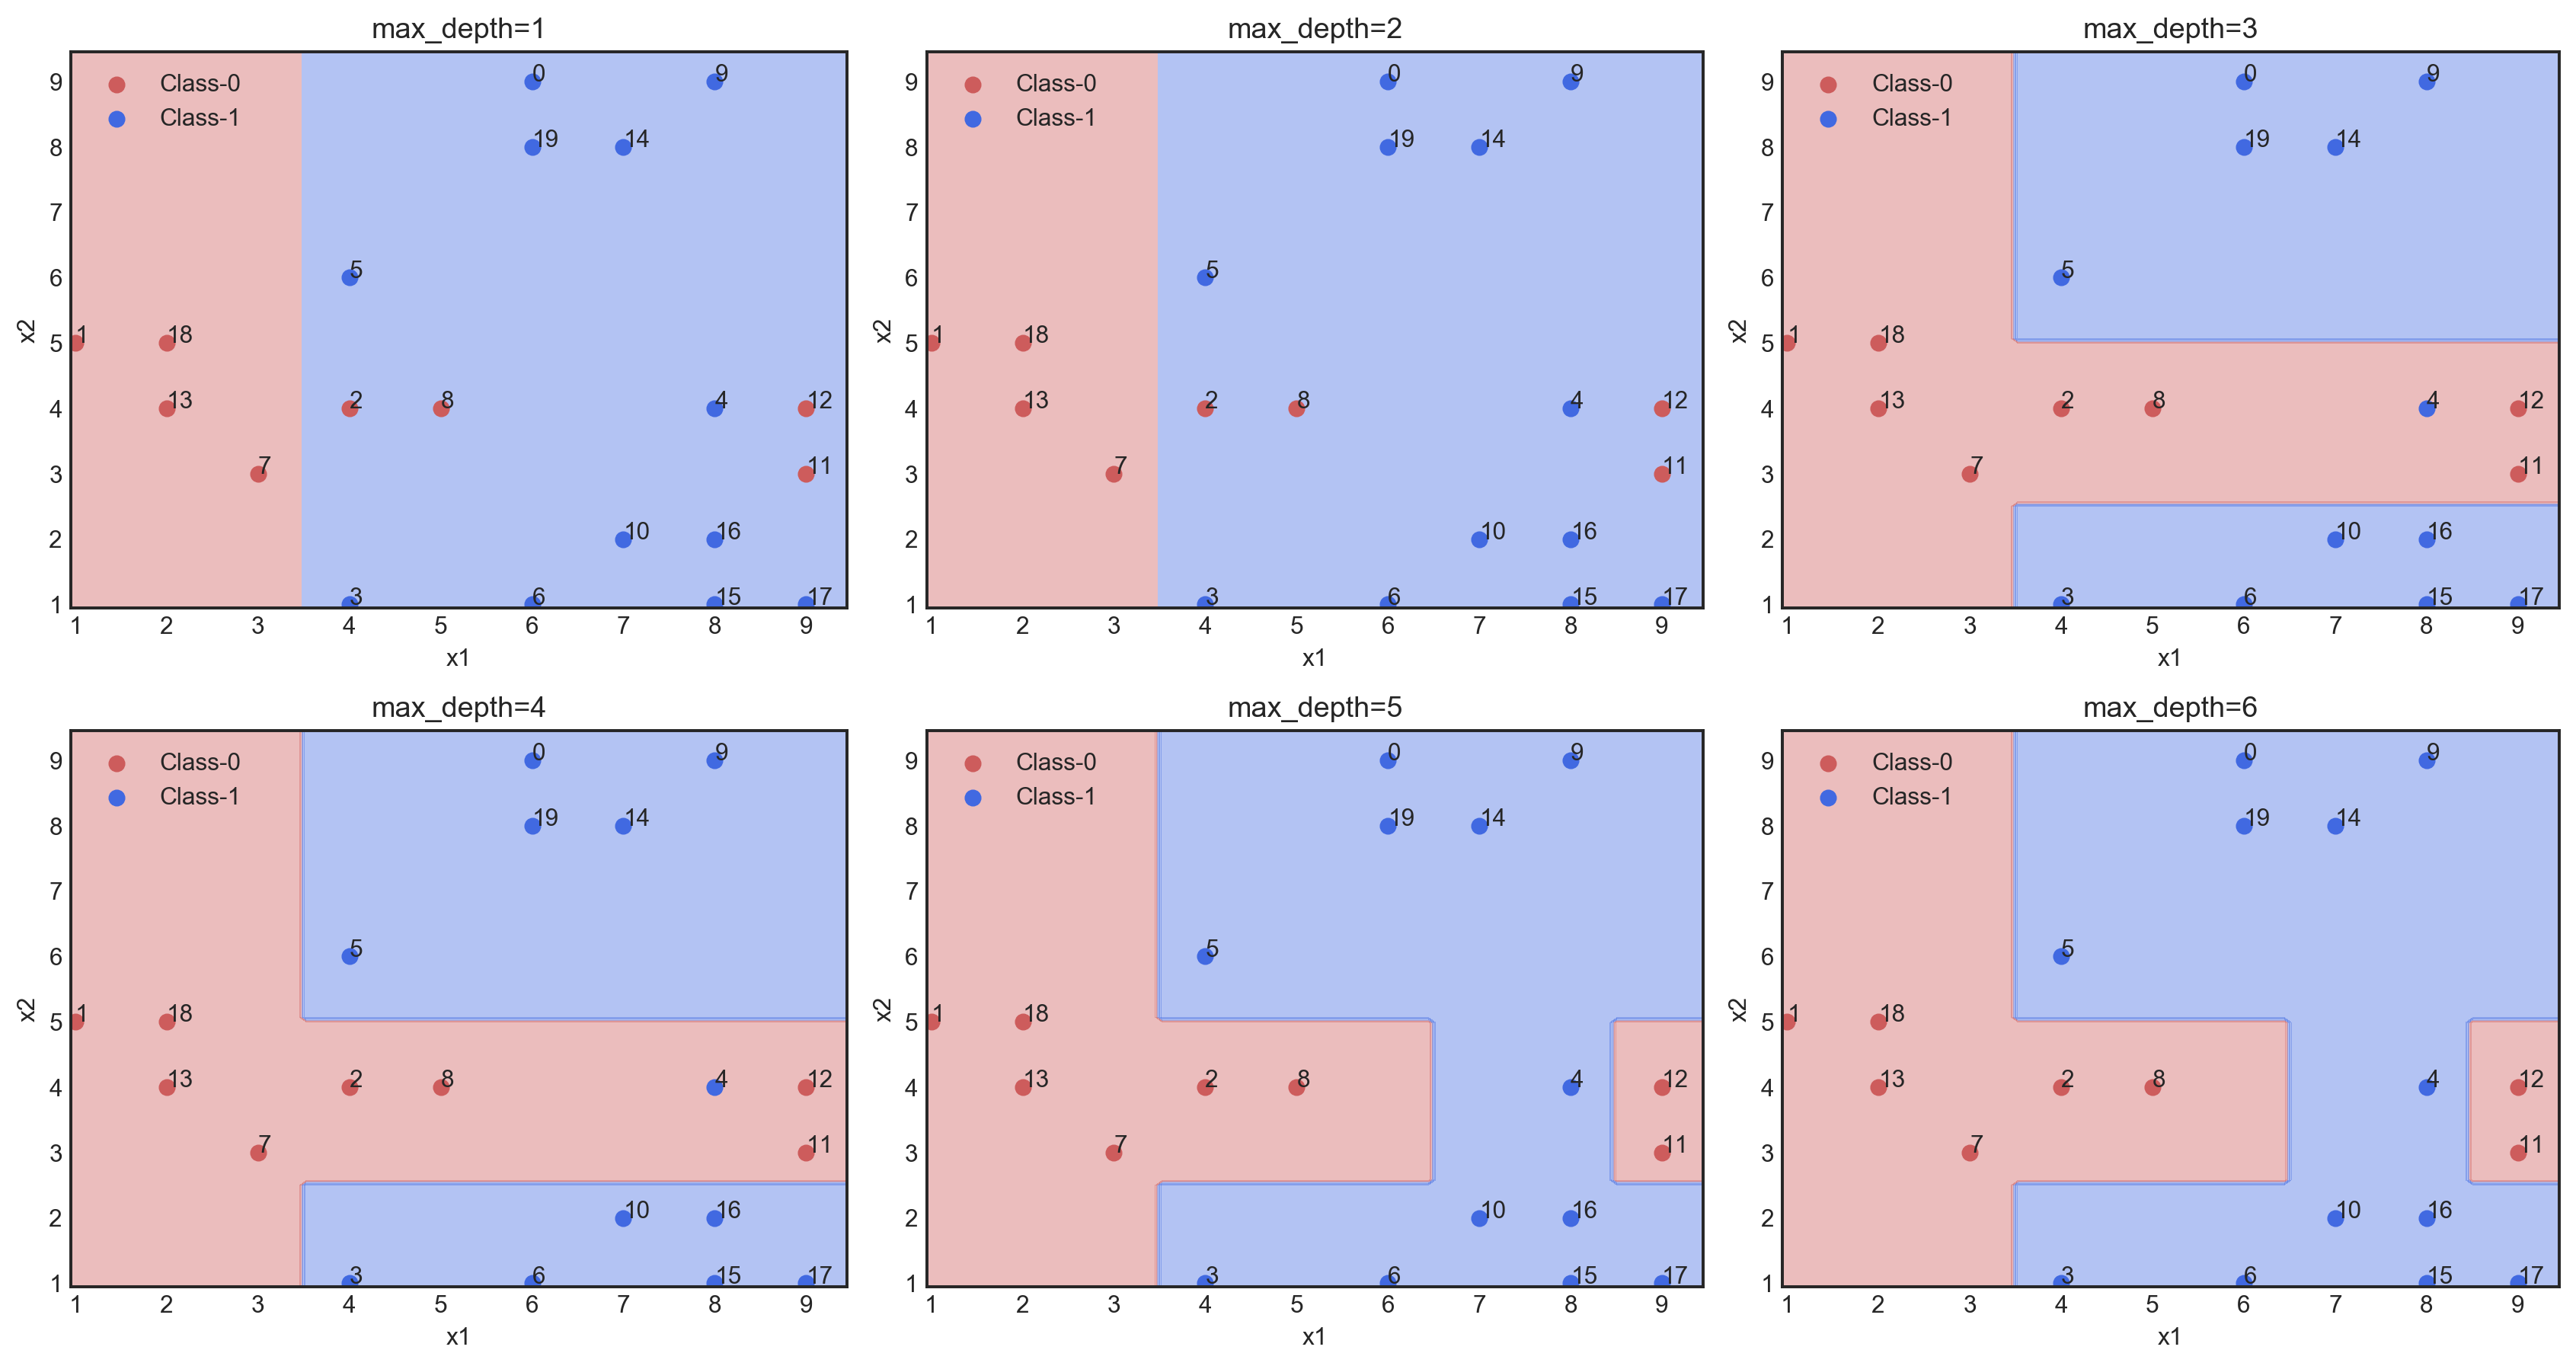

In [6]:
df = pd.read_csv('./data/tree_data_3.csv')
X = df.values[:, :2]
y = df.values[:, 2].astype(np.int)

fig, axes = plt.subplots(2, 3, dpi=227, figsize=(15, 8))
for (ax, depth) in zip(axes.ravel(), [1, 2, 3, 4, 5, 6]):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0)
    clf.fit(X, y)

    Plot_2d_decision(clf, X, y, ax=ax, fillcolor=True)
    Plot_2d(X, y, ax=ax)
    
    for i in range(len(y)):
        ax.annotate(str(i), (X[i, 0], X[i, 1]))
    ax.set_title(f'max_depth={depth}')
plt.tight_layout()

In [7]:
buyers = pd.read_csv('./data/pc_buyers.csv', index_col=0)
buyers

,age,income,student,credit_rating,buys_computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle_aged,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes
5,senior,low,yes,excellent,no
6,middle_aged,low,yes,excellent,yes
7,youth,medium,no,fair,no
8,youth,low,yes,fair,yes
9,senior,medium,yes,fair,yes


## Type of feature values
### real number
> price: 13.96, 15.05, 17.13
### categorical feature
> color: red, green, blue    
> gender: female, male
### ordinal feature
> size: S, M, L, XL   
> income: low, medium, high

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

buyers = pd.read_csv('./data/pc_buyers.csv', index_col=0)
for col in buyers:
    buyers[col] = le.fit_transform(buyers[col])
    print(le.classes_)

buyers

['middle_aged' 'senior' 'youth']
['high' 'low' 'medium']
['no' 'yes']
['excellent' 'fair']
['no' 'yes']


,age,income,student,credit_rating,buys_computer
0,2,0,0,1,0
1,2,0,0,0,0
2,0,0,0,1,1
3,1,2,0,1,1
4,1,1,1,1,1
5,1,1,1,0,0
6,0,1,1,0,1
7,2,2,0,1,0
8,2,1,1,1,1
9,1,2,1,1,1


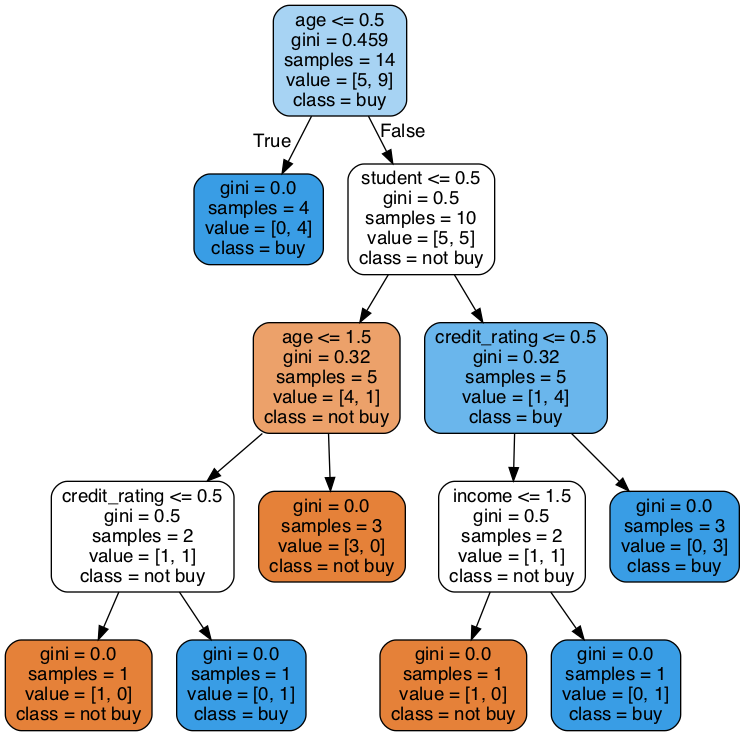

In [9]:
y = buyers['buys_computer'].values
X = buyers.drop('buys_computer', axis=1).values

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', random_state=0)
clf.fit(X, y)

from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(
    clf, 
    filled=True,
    rounded=True,
    class_names=['not buy', 'buy'],
    feature_names=['age', 'income', 'student', 'credit_rating'],
    out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('./charts/tree.png')

from IPython.display import Image
Image(filename = './charts/tree.png', width=500)

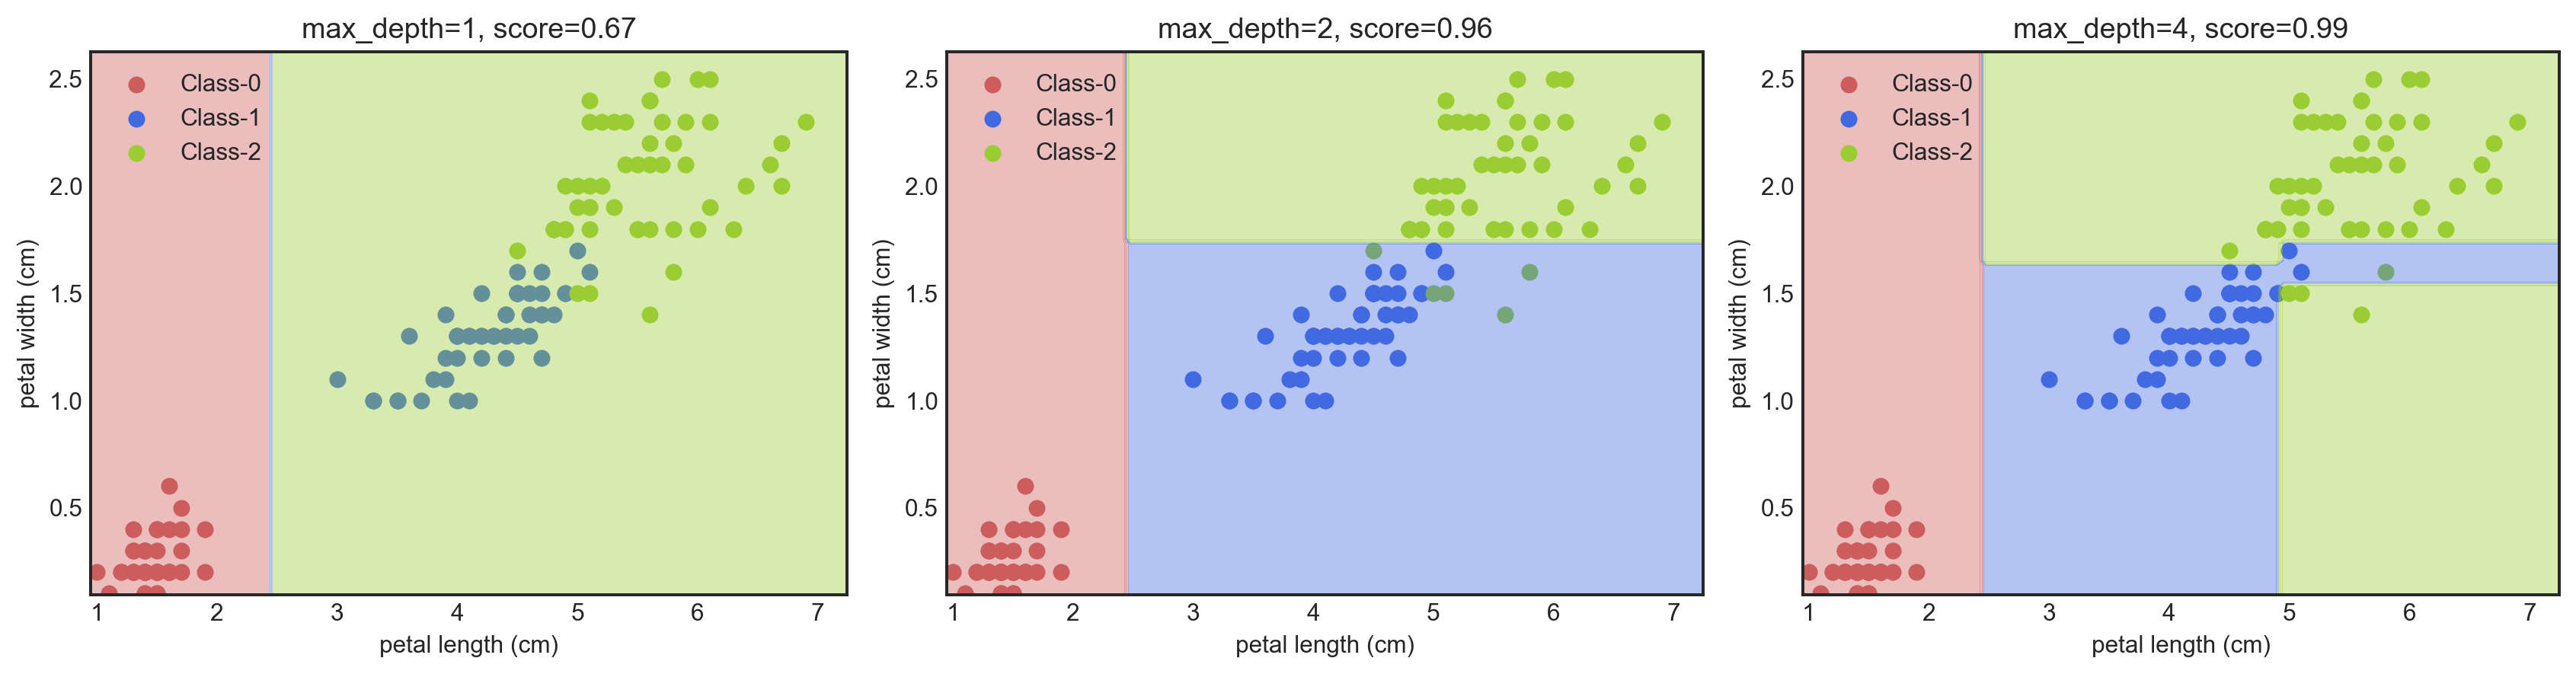

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

from sklearn.tree import DecisionTreeClassifier

fig, axes = plt.subplots(1, 3, dpi=227, figsize=(15, 4))
for ax, d in zip(axes.ravel(), [1, 2, 4]):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X, y)

    Plot_2d(X, y, ax=ax)
    Plot_2d_decision(clf, X, y, ax=ax)
    ax.set_xlabel(iris.feature_names[2])
    ax.set_ylabel(iris.feature_names[3])
    ax.legend()
    ax.set_title(f'max_depth={d}, score={clf.score(X, y):.2f}')
plt.tight_layout()

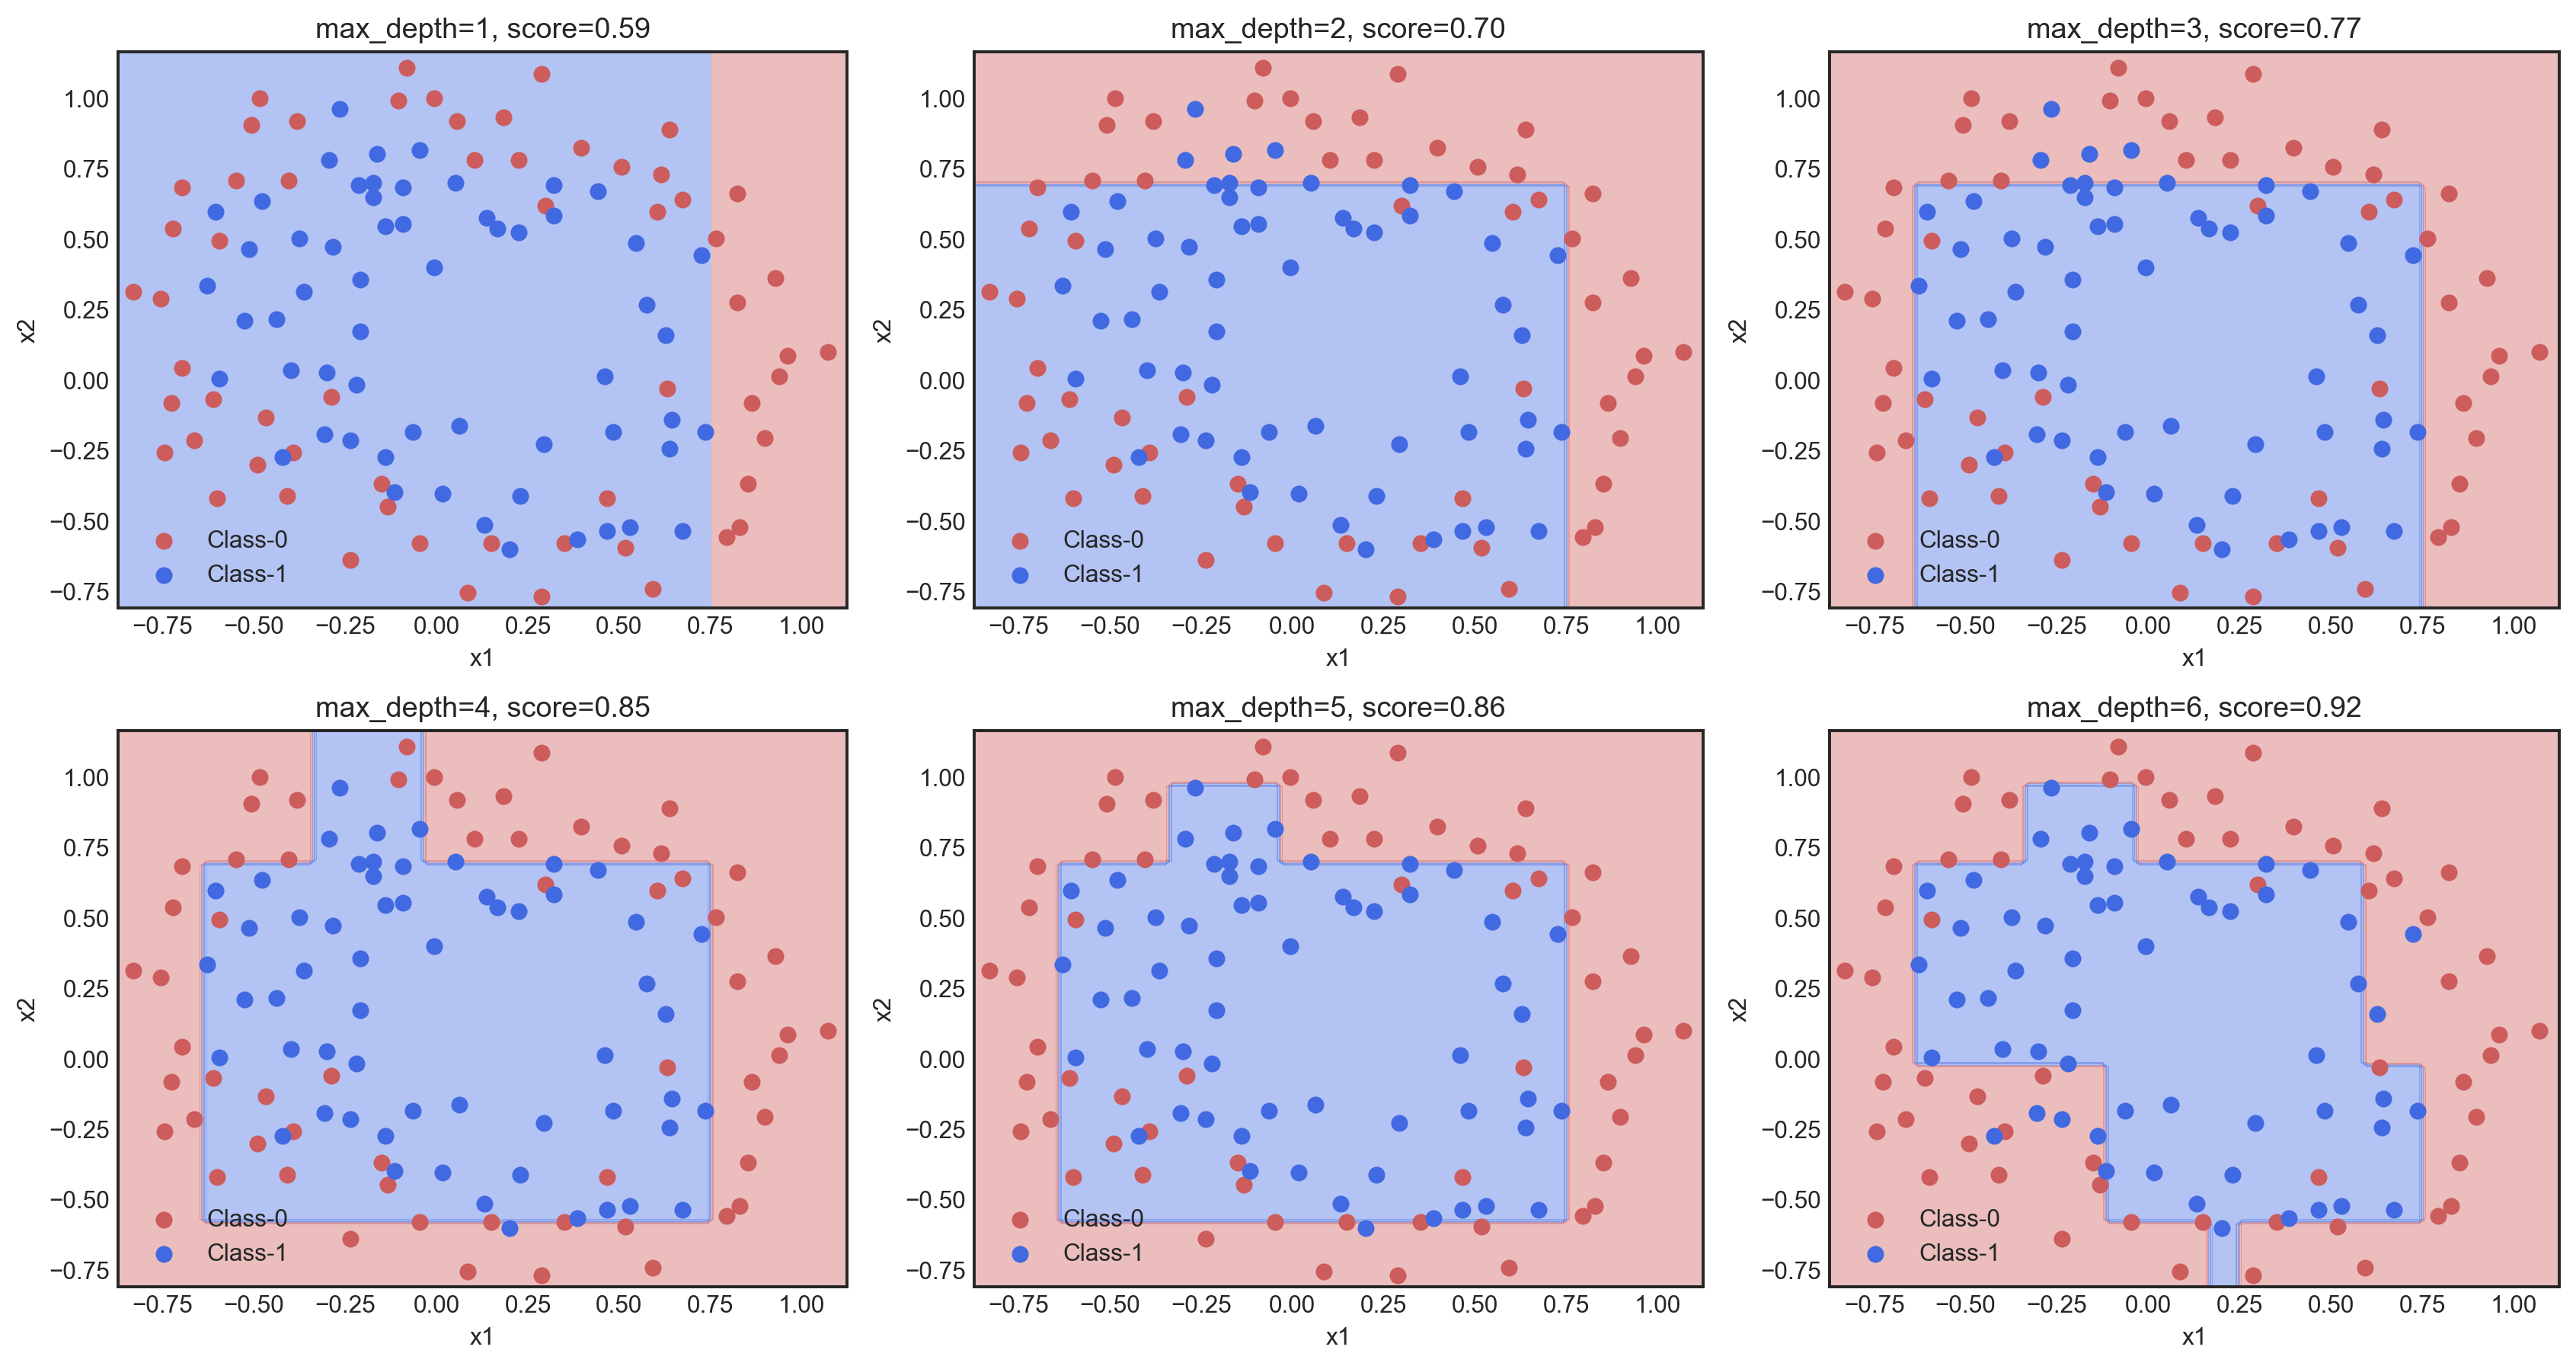

In [11]:
data = np.loadtxt('./data/ex2data2.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2].astype(np.int)

from sklearn.tree import DecisionTreeClassifier

fig, axes = plt.subplots(2, 3, dpi=227, figsize=(15, 8))
for (ax, depth) in zip(axes.ravel(), [1, 2, 3, 4, 5, 6]):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf.fit(X, y)

    Plot_2d_decision(clf, X, y, ax=ax, fillcolor=True)
    Plot_2d(X, y, ax=ax)
    ax.set_title(f'max_depth={depth}, score={clf.score(X, y):.2f}')
plt.tight_layout()